In [34]:
#Importing required Modules and libraries
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import urllib2 as url
from StringIO import StringIO
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [35]:
allmales = {}
allfemales = {}
allmales['all'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_2_1_1.xls',header=9)
allmales['white'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_2_1_4.xls',header=9)
allmales['black'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_2_1_6.xls',header=9)
allmales['hispanic'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_2_1_9.xls',header=9)
allmales['asian'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_2_1_8.xls',header=9)

In [36]:
allfemales['all'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_3_1_1.xls',header=9)
allfemales['white'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_3_1_4.xls',header=9)
allfemales['black'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_3_1_6.xls',header=9)
allfemales['hispanic'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_3_1_9.xls',header=9)
allfemales['asian'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'+'/pinc08_3_1_8.xls',header=9)

In [37]:
from pandas.tools.plotting import scatter_matrix
#scatter_matrix (allmales['all'], s=300, figsize=(16, 16), diagonal='kde')

In [38]:
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [39]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
print allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [41]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A297518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001F4755C0>]], dtype=object)

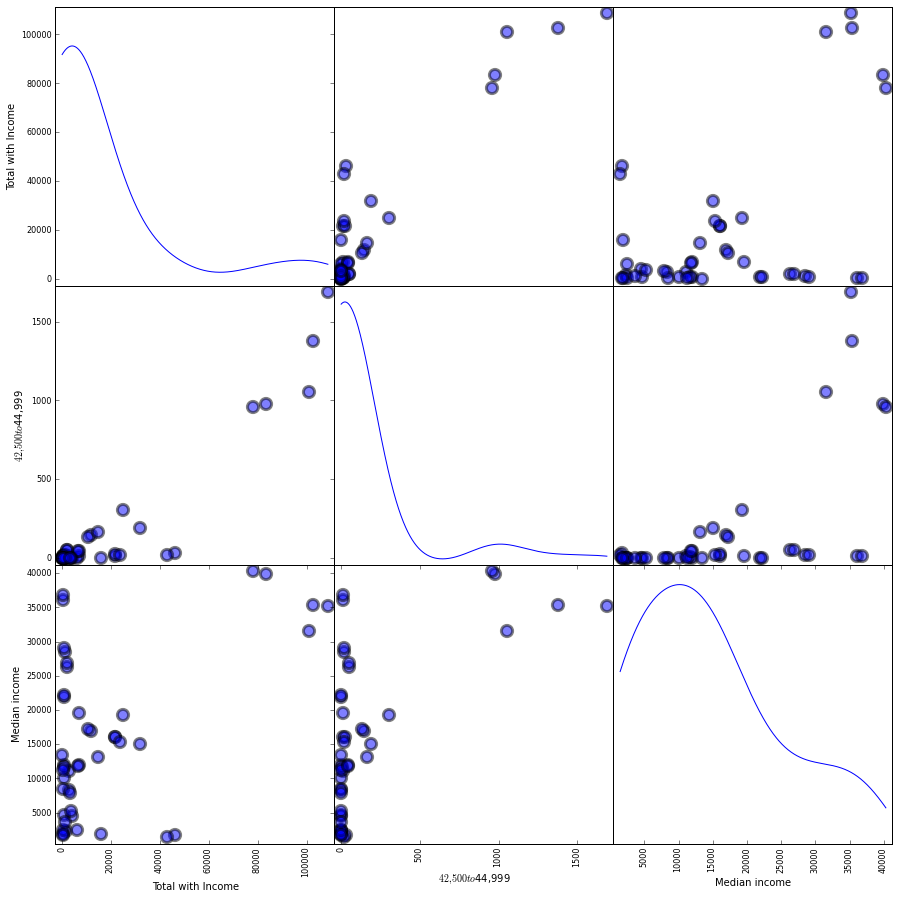

In [42]:
scatter_matrix(allmales['all'][[u'Total with Income', u'$42,500 to $44,999',u'Median income']], 
               figsize=(15,15), linewidth= 3, s=500, diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A035908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000200F1940>]], dtype=object)

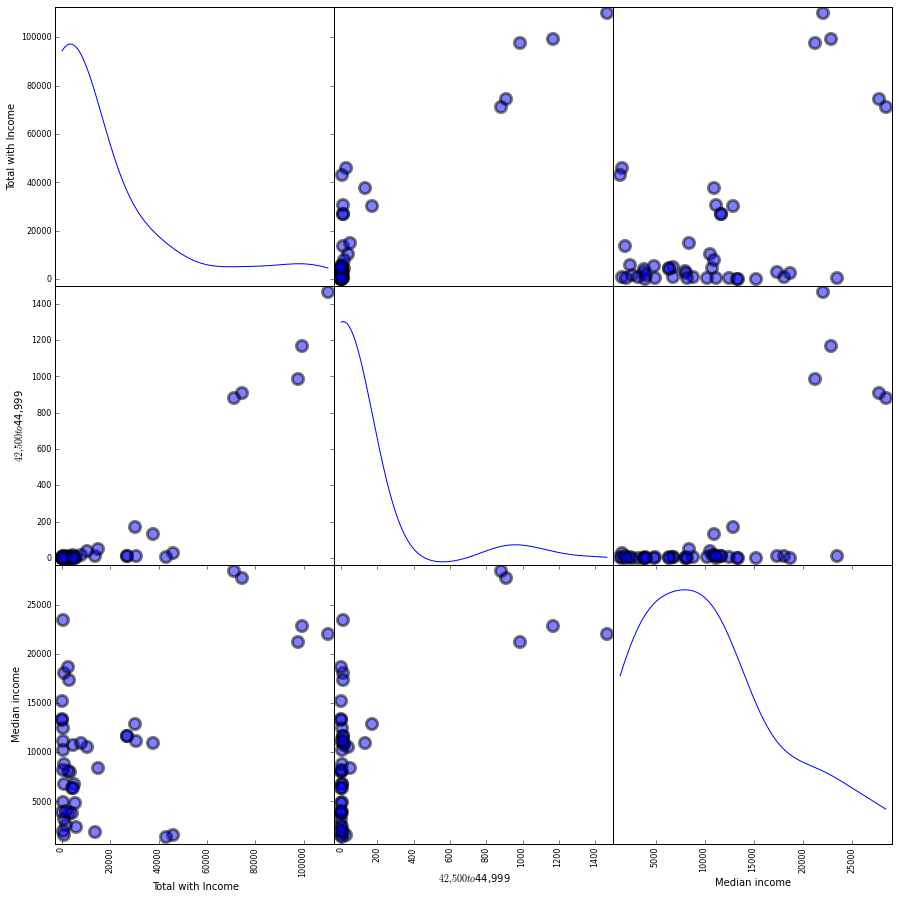

In [43]:
scatter_matrix(allfemales['all'][[u'Total with Income', u'$42,500 to $44,999',u'Median income']], 
               figsize=(15,15), linewidth= 3, s=500, diagonal='kde')

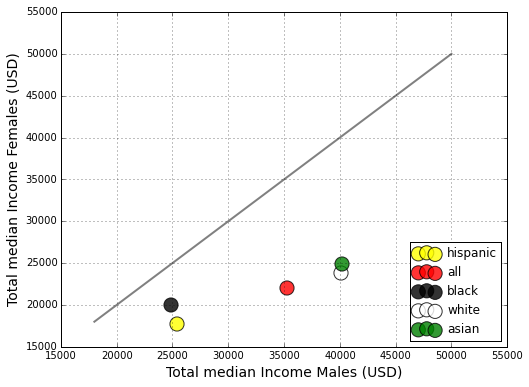

In [44]:
col={'all':'Red','white':'white','black':'black','hispanic':'yellow','asian':'green'}
fig = figure(figsize=(8,6))
for n in col:
    pl.scatter(allmales[n]['Median income'][1], allfemales[n]['Median income'][1], c=col[n],label=n, s=200, alpha = 0.8)
pl.xlabel('Total median Income Males (USD)',fontsize=14)
pl.ylabel('Total median Income Females (USD)',fontsize=14)
pl.legend(loc=4)
pl.grid()
pl.plot([18000, 50000], [18000, 50000], 'grey', lw=2)

In [45]:
a = []
b = []
for n in col:
    x = allmales[n]['Median income'][1]
    y = allfemales[n]['Median income'][1]
    a.append(x)
    b.append(y)
TMmediandt = pd.DataFrame(a, columns=['TMmedian'])
TFmediandt = pd.DataFrame(b, columns=['TFmedian'])
Ttmediant = pd.merge(TMmediandt, TFmediandt, left_index=True, right_index=True)
mod = smf.ols(formula='TFmedian ~ TMmedian', data = Ttmediant).fit()
a = (mod.params)

In [46]:
#Simlating 100 estimated Total energy observations with the coeficcients of the regression
x_prime = np.linspace(Ttmediant.TMmedian.min(), Ttmediant.TMmedian.max(), 100)
y_hat = a[0] + a[1]*(x_prime)

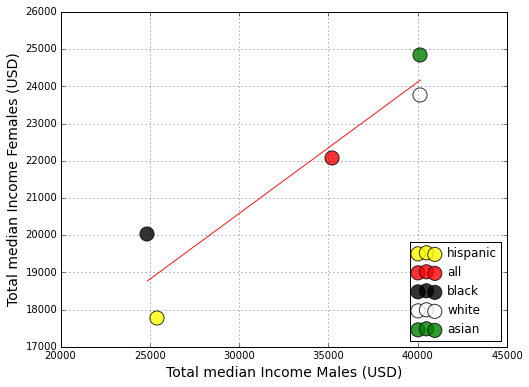

In [47]:
#plot Total energy vs Total units with a log scale, and a simulated linear regression line
col={'all':'Red','white':'white','black':'black','hispanic':'yellow','asian':'green'}
fig = figure(figsize=(8,6))
for n in col:
    pl.scatter(allmales[n]['Median income'][1], allfemales[n]['Median income'][1], c=col[n],label=n, s=200, alpha = 0.8)
pl.xlabel('Total median Income Males (USD)',fontsize=14)
pl.ylabel('Total median Income Females (USD)',fontsize=14)
pl.legend(loc=4)
pl.grid()
pl.plot(x_prime, y_hat, 'r', alpha=0.9)

In [48]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(Ttmediant.TMmedian, Ttmediant.TFmedian)
np.std(Ttmediant.TMmedian)/np.std(Ttmediant.TFmedian)
beta1=cor[0]*np.std(Ttmediant.TFmedian)/np.std(Ttmediant.TMmedian)
beta0=np.mean(Ttmediant.TFmedian)-beta1*np.mean(Ttmediant.TMmedian)
y_hat1 = beta0 + beta1*(x_prime)

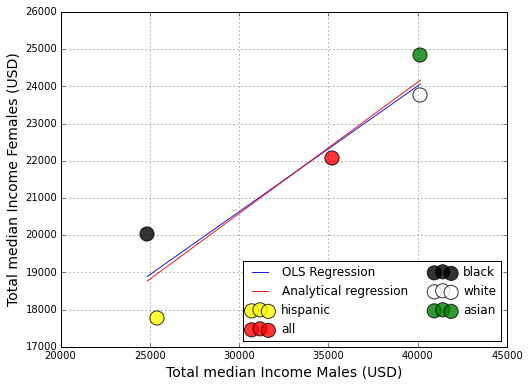

In [118]:
#plot Total median income by gender and by race and fit the two lines (OLS and best regression line)
col={'all':'Red','white':'white','black':'black','hispanic':'yellow','asian':'green'}
fig = figure(figsize=(8,6))
for n in col:
    pl.scatter(allmales[n]['Median income'][1], allfemales[n]['Median income'][1], c=col[n],label=n, s=200, alpha = 0.8)
pl.xlabel('Total median Income Males (USD)',fontsize=14)
pl.ylabel('Total median Income Females (USD)',fontsize=14)
pl.grid()
pl.plot(x_prime, y_hat1, 'b', alpha=0.9, label = "OLS Regression")
pl.plot(x_prime, y_hat, 'r', alpha=0.9, label = "Analytical regression")
pl.legend(ncol=2, loc=4)

In [119]:
#Concatenate the arrys of data for males and females
all_males = np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income']\
                                        [:].values,allmales['black']['Median income'][:].values,allmales['hispanic']\
                                        ['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())
all_females = np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income']\
                                          [:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']\
                                          ['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

In [120]:
#Convert the arrays to pandas dataframes to mask them, and merge them
all_males1 = pd.DataFrame(all_males)
all_females1 = pd.DataFrame(all_females)
all_all = pd.merge(all_males1, all_females1, left_index=True, right_index=True)
all_all.columns = ['all_males', 'all_females']

#Run OLS Regression on merged DF
mod3 = smf.ols(formula='all_females ~ all_males', data = all_all).fit()
c = (mod3.params)
x_prime2 = np.linspace(all_all.all_males.min(), all_all.all_males.max(), 100)
y_hat2 = c[0] + c[1]*(x_prime2)

In [110]:
#estimate analytical regression
cor = stats.spearmanr(all_all.all_males, all_all.all_females)
np.std(all_all.all_males)/np.std(all_all.all_females)
beta11=cor[0]*np.std(all_all.all_females)/np.std(all_all.all_males)
beta00=np.mean(all_all.all_females)-beta1*np.mean(all_all.all_males)
y_hat11 = beta00 + beta11*(x_prime2)

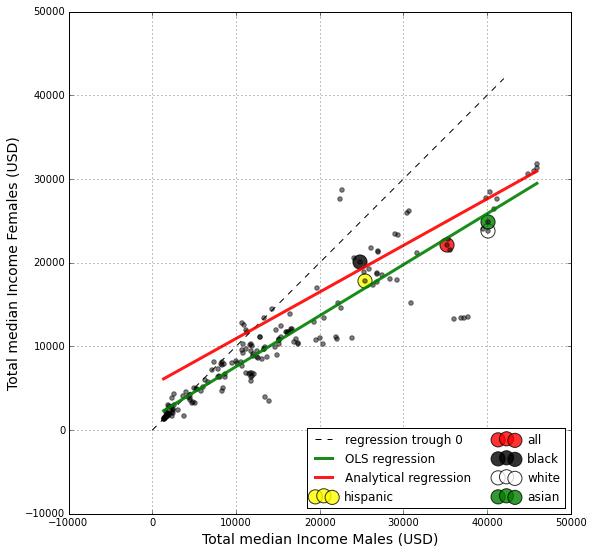

In [114]:
#Plot the total median income, the scatter plot for all the income data
# and the analytical, OLS and through 0 regressions.
col={'all':'Red','white':'white','black':'black','hispanic':'yellow','asian':'green'}
fig = figure(figsize=(9,9))
for n in col:
    pl.scatter(allmales[n]['Median income'][1], allfemales[n]['Median income'][1], c=col[n],label=n, s=200, alpha = 0.8)
pl.plot([0,42000],[0,42000],'k--', label = 'regression trough 0')
pl.xlabel('Total median Income Males (USD)',fontsize=14)
pl.ylabel('Total median Income Females (USD)',fontsize=14)
pl.grid()
pl.scatter(all_males1, all_females1, color='k', alpha=0.5)
pl.plot(x_prime2, y_hat2, 'g', alpha=0.9 , lw = 3, label = "OLS regression")
pl.plot(x_prime2, y_hat11, 'r', alpha=0.9 , lw = 3, label = "Analytical regression")
pl.legend(ncol = 2, loc=4)

Selected stipend = USD 90.000 

In [136]:
w_estimation = c[0] + c[1]*(90000.0)
print ('The estimated estipend for a women compared to a man with an estipend of USD 90000.00 is USD %.2f') % w_estimation

The estimated estipend for a women compared to a man with an estipend of USD 90000.00 is USD 56304.89
